In [2]:
!pip install geopandas

   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   -------------------------- ------------- 12.6/19.2 MB 65.9 MB/s eta 0:00:01
   --------------------------- ------------ 13.1/19.2 MB 32.9 MB/s eta 0:00:01
   ------------------------------ --------- 14.4/19.2 MB 23.2 MB/s eta 0:00:01
   ----------------------------------- ---- 16.8/19.2 MB 20.7 MB/s eta 0:00:01
   ---------------------------------------- 19.2/19.2 MB 19.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------------------- 6.3/6.3 MB 77.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 46.5 MB/s eta 0:00:00


In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [287]:
data = pd.read_csv('Sample - Superstore Dataset.csv')

In [267]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/08/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,06/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [268]:
# Pra conocer la estructura y los valores nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [269]:
# Verificamos los valores duplicados
data.duplicated().sum()

0

## Gráficos de barras y líneas

In [376]:
# Conocemos los valores únicos de la variable Category
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

### Creamos un grafico de barras para la variable Category

<function matplotlib.pyplot.show(close=None, block=None)>

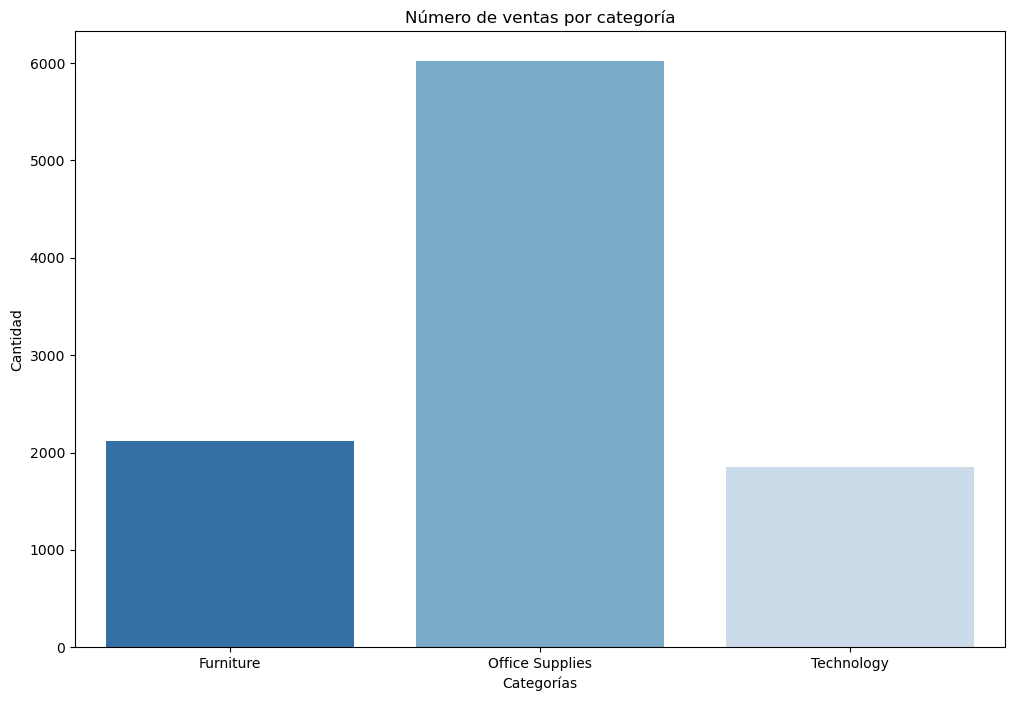

In [271]:
plt.figure(figsize = (12, 8))
sns.countplot(data = data, x = 'Category', hue = 'Category', palette = 'Blues_r')
plt.title('Número de ventas por categoría')
plt.xlabel('Categorías')
plt.ylabel('Cantidad')
plt.show

### Presencia en regiones a lo largo del tiempo

In [377]:
data['Year'] = pd.to_datetime(data['Order Date']).dt.year

In [379]:
# Obtener top 10 estados con mas presencia
top_states = data['State'].value_counts()

In [380]:
top_states

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

In [381]:
top_states = top_states.head(10).index.tolist()

In [369]:
top_states

['California',
 'New York',
 'Texas',
 'Pennsylvania',
 'Washington',
 'Illinois',
 'Ohio',
 'Florida',
 'Michigan',
 'North Carolina']

In [370]:
data_filtered = data[data['State'].isin(top_states)]

In [371]:
state_count = data_filtered.groupby('Year')['State'].value_counts().unstack(fill_value = 0)

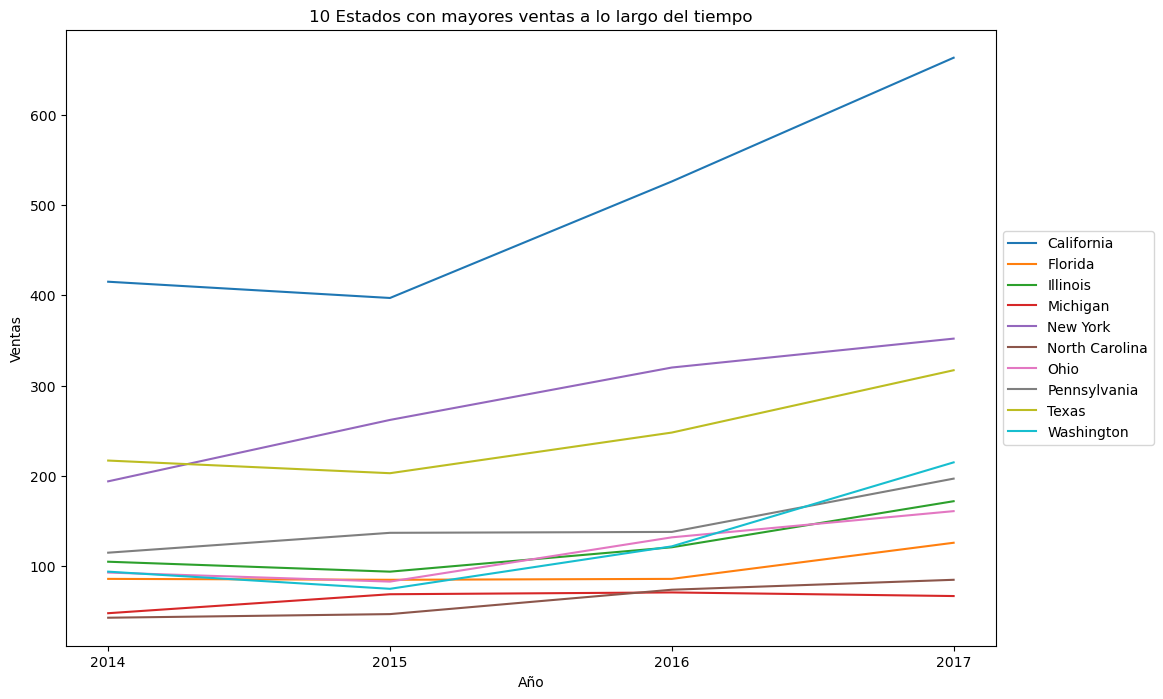

In [373]:
state_count.plot(kind = 'line', figsize = (12, 8))
plt.title('10 Estados con mayores ventas a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Ventas')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xticks(ticks = profit_count.index, labels = [int(year) for year in profit_count.index])
plt.show()

## Gráficos de columnas apiladas

In [159]:
sales_by_subcategory = data.groupby(['Year', 'Sub-Category'])['Sales'].sum().unstack().fillna(0)

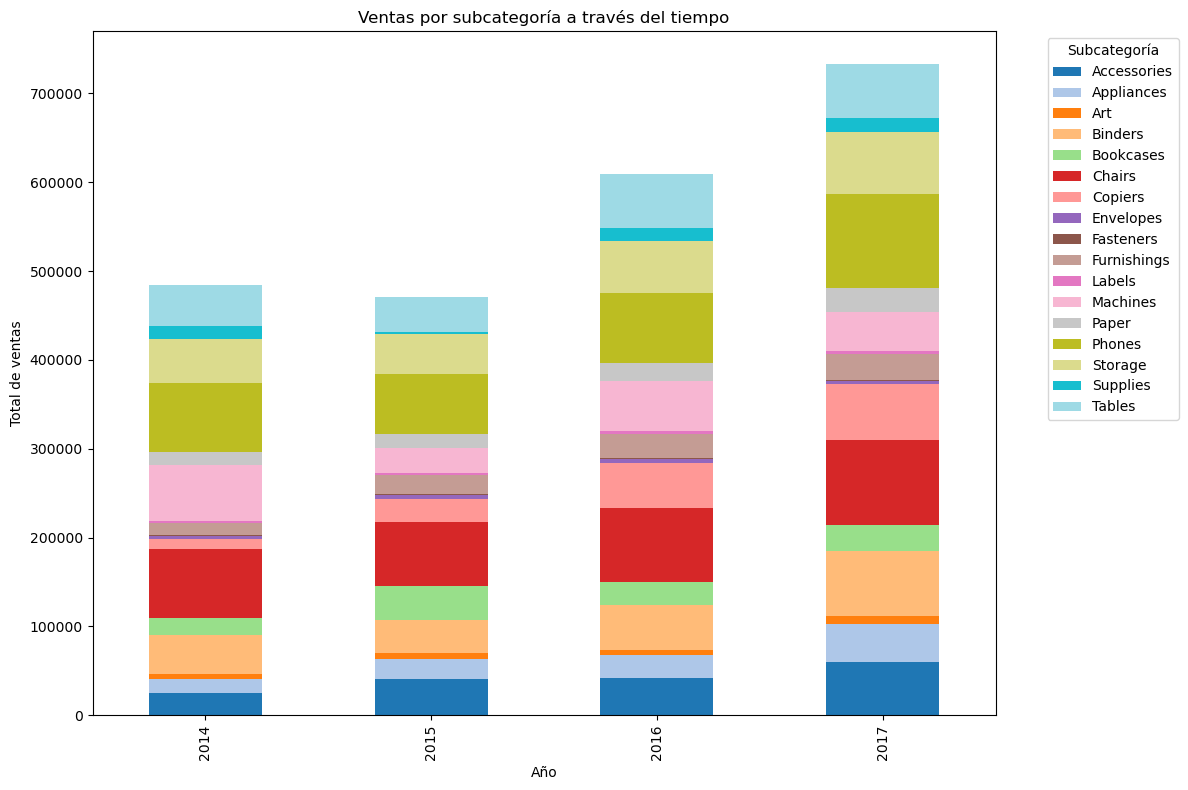

In [167]:
sales_by_subcategory.plot(kind = 'bar', stacked = True, figsize = (12, 8), colormap = 'tab20')
plt.title('Ventas por subcategoría a través del tiempo')
plt.xlabel('Año')
plt.ylabel('Total de ventas')
plt.legend(title = 'Subcategoría', bbox_to_anchor = (1.05, 1))
plt.tight_layout()
plt.show()

## Representación geográfica

In [189]:
geo_data = gpd.read_file('cb_2018_us_state_500k/cb_2018_us_state_500k.shp')

In [190]:
sales_by_state = data.groupby('State')['Sales'].sum().reset_index()

In [213]:
sales_by_state = sales_by_state.sort_values(by = 'Sales', ascending = False)

In [214]:
sales_by_state

,NAME,Sales
3,California,457687.6315
30,New York,310876.2710
41,Texas,170188.0458
45,Washington,138641.2700
36,Pennsylvania,116511.9140
8,Florida,89473.7080
11,Illinois,80166.1010
33,Ohio,78258.1360
20,Michigan,76269.6140
44,Virginia,70636.7200


In [194]:
geo_data.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."


In [215]:
sales_by_state.rename(columns = {'State': 'NAME'}, inplace = True)

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  NAME           9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [217]:
gdf = geo_data.merge(sales_by_state, on = "NAME", how = "left")

In [218]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   56 non-null     object  
 1   STATENS   56 non-null     object  
 2   AFFGEOID  56 non-null     object  
 3   GEOID     56 non-null     object  
 4   STUSPS    56 non-null     object  
 5   NAME      56 non-null     object  
 6   LSAD      56 non-null     object  
 7   ALAND     56 non-null     int64   
 8   AWATER    56 non-null     int64   
 9   geometry  56 non-null     geometry
 10  Sales     49 non-null     float64 
dtypes: float64(1), geometry(1), int64(2), object(7)
memory usage: 4.9+ KB


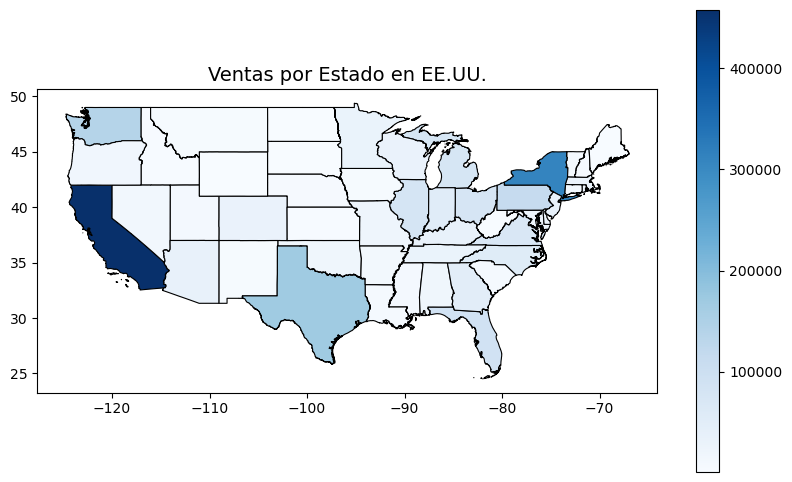

In [219]:
fig, ax = plt.subplots(figsize = (10, 6))
gdf.plot(column = 'Sales', cmap='Blues', legend=True, edgecolor="black", linewidth=0.8, ax=ax)
ax.set_title("Ventas por Estado en EE.UU.", fontsize=14)
plt.show()